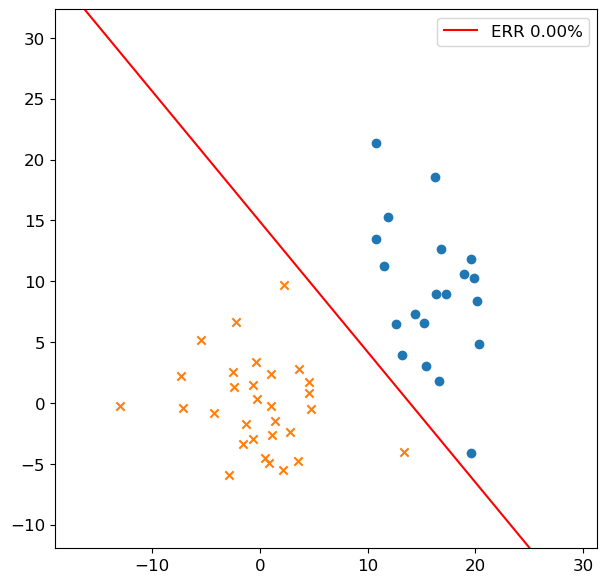

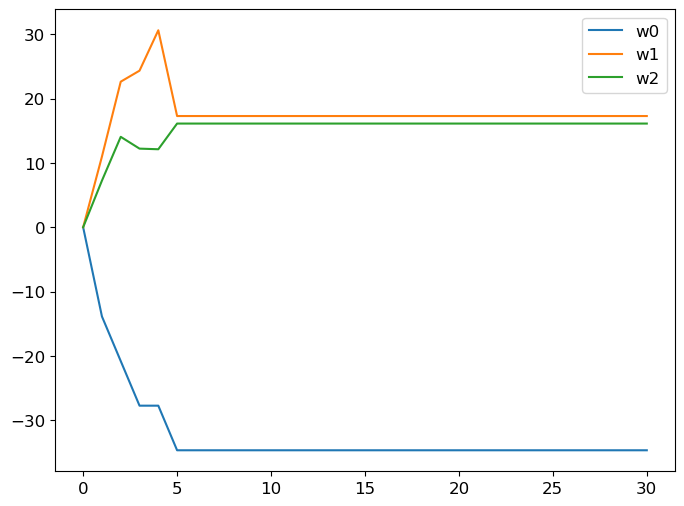

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import multivariate_normal

import matplotlib
matplotlib.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings('ignore')

def prepare_dataset(n1, mu1, variance1, n2, mu2, variance2):
    df1 = DataFrame(multivariate_normal(mu1, np.eye(2)*variance1, n1), columns=['x', 'y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(mu2, np.eye(2)*variance2, n2), columns=['x', 'y'])
    df2['type'] = -1
    df = pd.concat([df1, df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

train_set = prepare_dataset(20, [15,10], 15, 30, [0,0], 15)

def run_train(train_set):
    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.abs().mean() + train_set.y.abs().mean())
    
    # Iterationを実施
    paramhist = DataFrame([[w0, w1, w2]], columns=['w0', 'w1', 'w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * bias
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(Series([w0, w1, w2], ['w0', 'w1', 'w2']),ignore_index=True)
    
    # 判定誤差の計算
    err = 0.0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)
    
    return paramhist, err_rate

paramhist, err_rate = run_train(train_set)

# 結果の表示
def show_result(subplot, train_set, w0, w1, w2, err_rate):
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    bias = 0.5 * (train_set.x.abs().mean() + train_set.y.abs().mean())
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10

    subplot.set_ylim([ymin-1, ymax+1])
    subplot.set_xlim([xmin-1, xmax+1])
    subplot.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    subplot.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex, liney, label=label, color='red')
    subplot.legend(loc=1)

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
params = paramhist[-1:]
w0, w1, w2 = float(params.w0), float(params.w1), float(params.w2)
show_result(subplot, train_set, w0, w1, w2, err_rate)
paramhist.plot(figsize=(8,6)).legend(loc=1)

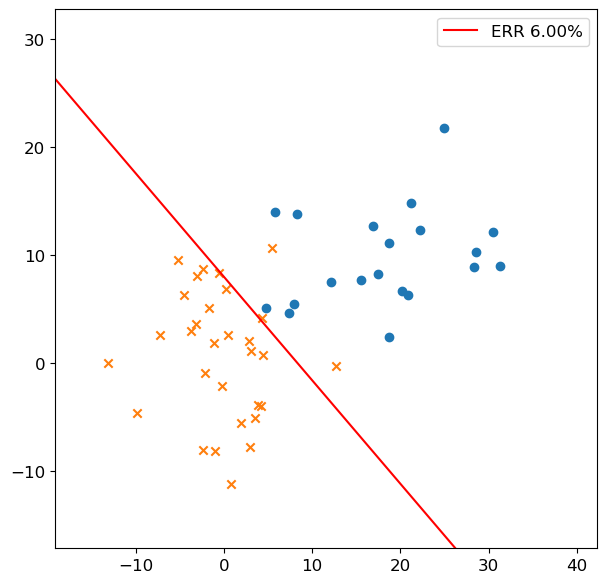

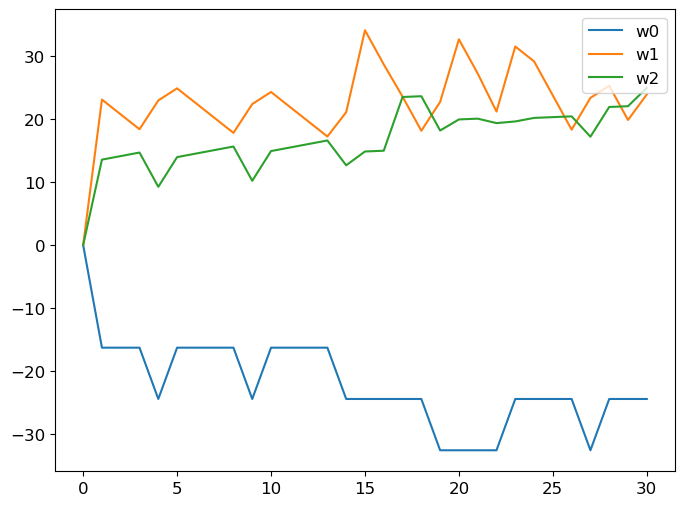

In [9]:
train_set = prepare_dataset(20, [15,10], 30, 30, [0,0], 30)
paramhist, err_rate = run_train(train_set)
fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
params = paramhist[-1:]
w0, w1, w2 = float(params.w0), float(params.w1), float(params.w2)
show_result(subplot, train_set, w0, w1, w2, err_rate)
paramhist.plot(figsize=(8, 6)).legend(loc=1)